In [1]:
# Creating a Python list with different data types
a = [10, 20, "GfG", 40, True]

print(a)

# Accessing elements using indexing
print(a[0])  # 10
print(a[1])  # 20
print(a[2])  # "GfG"
print(a[3])  # 40
print(a[4])  # True

# Checking types of elements
print(type(a[2]))  # str
print(type(a[4]))  # bool

[10, 20, 'GfG', 40, True]
10
20
GfG
40
True
<class 'str'>
<class 'bool'>


In [2]:
import numpy as np

# Sample rocket velocity and acceleration vectors (m/s, m/s^2)
velocity = np.array([100, 200, 300])  # x, y, z components
acceleration = np.array([10, 5, 2])   # x, y, z components
time_step = 0.1  # seconds

# Calculate new velocity after time step: v_new = v + a * t
new_velocity = velocity + acceleration * time_step

# Compute magnitude of new velocity (speed)
speed = np.linalg.norm(new_velocity)

print("Initial Velocity:", velocity)
print("New Velocity:", new_velocity)
print("Speed (m/s):", speed)

# Matrix operation: rotation matrix to adjust trajectory (90-degree rotation around z-axis)
rotation_matrix = np.array([[0, -1, 0],
                           [1, 0, 0],
                           [0, 0, 1]])
rotated_velocity = np.dot(rotation_matrix, new_velocity)

print("Rotated Velocity:", rotated_velocity)

Initial Velocity: [100 200 300]
New Velocity: [101.  200.5 300.2]
Speed (m/s): 374.86169449544985
Rotated Velocity: [-200.5  101.   300.2]


In [3]:
import pandas as pd

# Sample telemetry data (time, altitude, velocity)
data = {
    'time_s': [0, 1, 2, 3, 4],
    'altitude_km': [0, 10, 25, 50, 80],
    'velocity_ms': [0, 200, 400, 600, 800]
}
df = pd.DataFrame(data)

# Basic analysis
print("Telemetry Data Summary:")
print(df.describe())

# Calculate acceleration (delta velocity / delta time)
df['acceleration_ms2'] = df['velocity_ms'].diff() / df['time_s'].diff()

# Filter data for high altitude (> 25 km)
high_altitude = df[df['altitude_km'] > 25]

print("\nHigh Altitude Data (>25 km):")
print(high_altitude)

# Save to CSV for sharing (open-source workflow)
df.to_csv('telemetry_data.csv', index=False)
print("\nData saved to telemetry_data.csv")

Telemetry Data Summary:
         time_s  altitude_km  velocity_ms
count  5.000000      5.00000     5.000000
mean   2.000000     33.00000   400.000000
std    1.581139     32.32646   316.227766
min    0.000000      0.00000     0.000000
25%    1.000000     10.00000   200.000000
50%    2.000000     25.00000   400.000000
75%    3.000000     50.00000   600.000000
max    4.000000     80.00000   800.000000

High Altitude Data (>25 km):
   time_s  altitude_km  velocity_ms  acceleration_ms2
3       3           50          600             200.0
4       4           80          800             200.0

Data saved to telemetry_data.csv


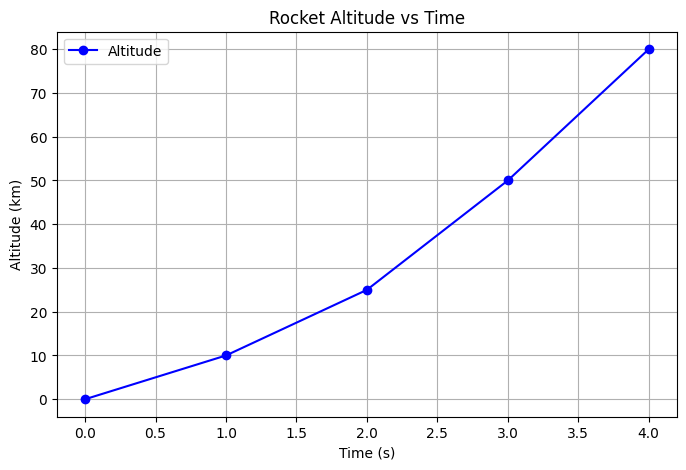

Plot saved as trajectory_plot.png


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample trajectory data
data = pd.DataFrame({
    'time_s': [0, 1, 2, 3, 4],
    'altitude_km': [0, 10, 25, 50, 80]
})

# Create line plot
plt.figure(figsize=(8, 5))
plt.plot(data['time_s'], data['altitude_km'], marker='o', color='blue', label='Altitude')
plt.title('Rocket Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.legend()

# Save plot for open-source sharing
plt.savefig('trajectory_plot.png')
plt.show()

print("Plot saved as trajectory_plot.png")

In [5]:
import requests

# Public SpaceX API (example: https://api.spacexdata.com/v5/launches/latest)
url = "https://api.spacexdata.com/v5/launches/latest"

try:
    # Send GET request
    response = requests.get(url)
    response.raise_for_status()  # Raise error for bad status

    # Parse JSON response
    launch_data = response.json()
    
    # Extract key info
    mission_name = launch_data['name']
    launch_date = launch_data['date_utc']
    rocket = launch_data['rocket']

    print(f"Mission: {mission_name}")
    print(f"Launch Date: {launch_date}")
    print(f"Rocket ID: {rocket}")

except requests.exceptions.RequestException as e:
    print("Error fetching data:", e)

Mission: Crew-5
Launch Date: 2022-10-05T16:00:00.000Z
Rocket ID: 5e9d0d95eda69973a809d1ec


In [1]:
# Constants
LIGHT_SPEED = 299792  # Speed of light in km/s
SECONDS_IN_YEAR = 365.25 * 24 * 60 * 60  # Seconds in a Julian year
LIGHT_YEAR_KM = LIGHT_SPEED * SECONDS_IN_YEAR  # Distance of a light year in km
EARTH_MARS_DISTANCE_KM = 225e6  # Average distance to Mars in km (225 million km)

# Input rocket speed (km/s)
rocket_speed = float(input("Enter rocket speed (km/s, e.g., 40 for advanced rocket): "))

# Calculate distance in light years
distance_light_years = EARTH_MARS_DISTANCE_KM / LIGHT_YEAR_KM

# Calculate travel time in seconds, then convert to days
travel_time_seconds = EARTH_MARS_DISTANCE_KM / rocket_speed
travel_time_days = travel_time_seconds / (60 * 60 * 24)

# Output results
print(f"Distance from Earth to Mars: {distance_light_years:.8f} light years")
print(f"Travel time at {rocket_speed} km/s: {travel_time_days:.2f} days")

Distance from Earth to Mars: 0.00002378 light years
Travel time at 24.0 km/s: 108.51 days


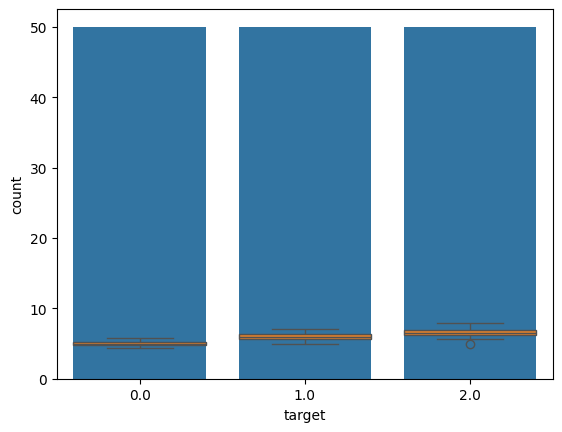

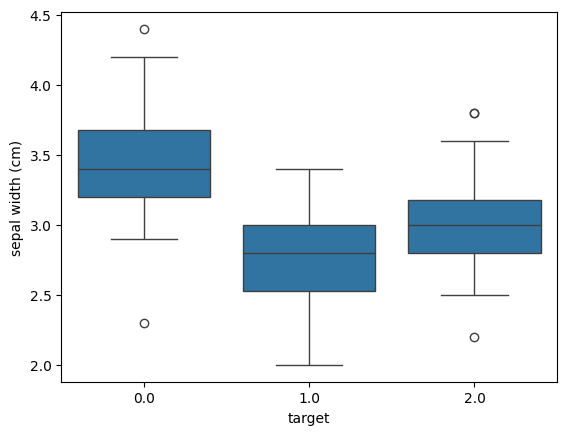

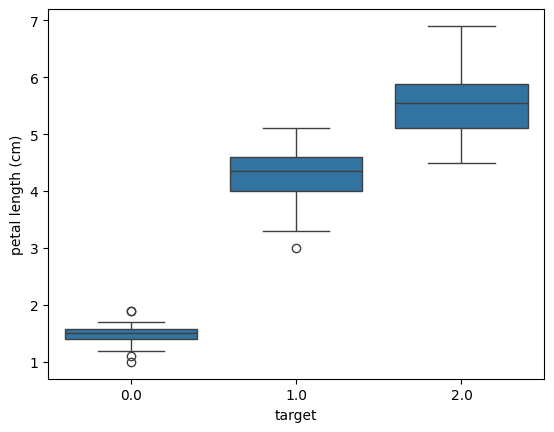

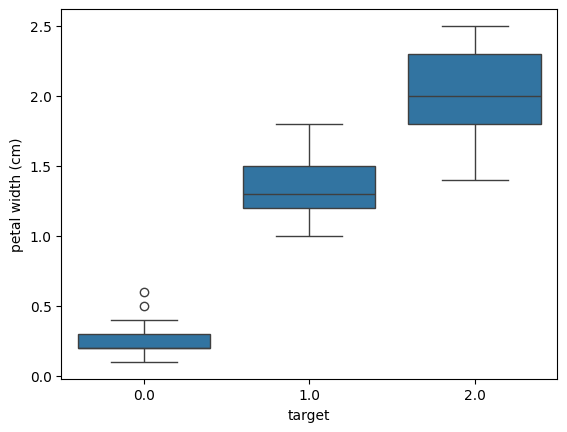

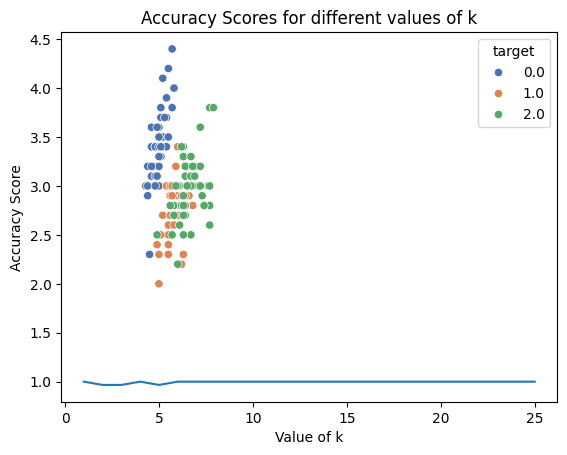

0.9166666666666666


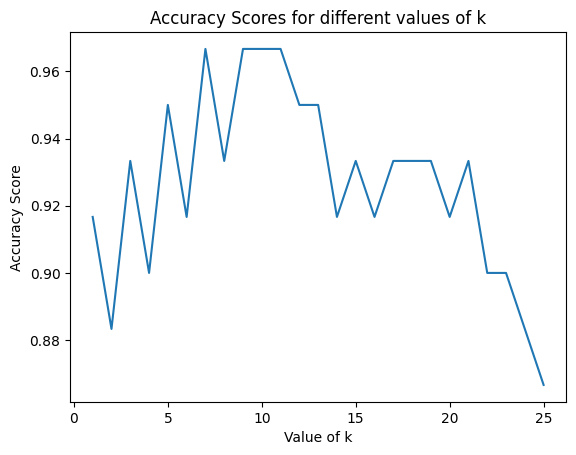

0.9666666666666667
[2.]
Virginica


c:\Users\ajitj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1]:
# -*- coding: utf-8 -*-
"""
#K-Nearest Neighbors (KNN) Algorithm Tutorial - Machine Learning Basics
* Tutorial: https://news.towardsai.net/knn
* Github: https://github.com/towardsai/tutorials/tree/master/k-nearest-neighbors
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

"""## Checking for outliers and imbalanced data"""

# data is perfectly balanced
sns.countplot(x='target', data=iris)

# not much of outliers to br handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

"""## Plotting a 2-D graph"""

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

"""## Separating features and target"""

# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']

"""## Split the dataset into train and test sets"""

# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# checking accuracy score for k-value rangin from 1 to 26
k_range = list(range(1,26))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

"""## Initial model"""

# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

"""## Finding the right k-value"""

# checking accuracy score for k-value rangin from 1 to 26
k_range = list(range(1,26))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

"""## Accuracy for optimal k-value"""

# 11 is the optimal k-value for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

"""## Predicting class of new data"""

knn = KNeighborsClassifier(n_neighbors=11)

# fitting the entire data without splitting
# into train and test
knn.fit(iris.drop(['target'], axis=1), iris['target'])

# new data to be classified
X_new = np.array([[1, 2.9, 10, 0.2]])
prediction = knn.predict(X_new)
print(prediction)

if prediction[0] == 0.0:
  print('Setosa')
elif prediction[0] == 1.0:
  print('Versicolor')
else:
  print('Virginica')
